# Simple Liear Regression
Shengheng Yan

we will discuss the simplest example with real data and only consider x and y, 2 dimension. 

## Example

Let's say we have data of hours that student put into study and grade they get, like below table.
our question is if we have new data of the hours that student put into study can we predict how much grade she/he will get?

| hours(x) | 1.1 | 2.5 | 2.7 | 3.2 | 5.5 | 7.7 | 8.9 | 9.2 |
|----------|-----|-----|-----|-----|-----|-----|-----|-----|
| grade(y) | 17  | 21  | 30  | 27  | 60  | 85  | 88  | 95  |

we assume grade $Y$ and $X$ has some kind of relationshipt which the more hours students puts the more grade they will get. So we can formulate a linear function. we call it <b>prediction function</b>.

$$\begin{align}
& f(x;w,b) = wx+b 
\end{align}$$
where $w$ is the weight, and $b$ is the bias.


our goal is to **find w, b** that makes the prediction function close enough to real data $y_i$ with respect to $x_i$

### Solution with only pan and paper 

#### Step1
Let's put all the date $X$ into our predict function
$$
\begin{align}
&f(1.1;w,b) = 1.1w + b \quad f(2.5;w,b) = 2.5w + b\quad  f(2.2;w,b) = 2.7w + b\quad f(3.2;w,b) = 3.2w + b \\
&f(5.5;w,b) = 5.5w + b \quad f(7.7;w,b) = 7.7w + b\quad  f(8.9;w,b) = 8.9w + b\quad f(9.2;w,b) = 9.2w + b \\
\end{align}
$$

#### Step2
Let's find the each distance from real data $y_i$ to our predict function $f(x_i;w,b) = wx_i + b$
$$
\begin{align}
&\sqrt{(17 - f(1.1;w,b))^2} \quad \sqrt{(21 - f(2.5;w,b))^2} \quad \sqrt{(30 - f(2.7;w,b))^2} \quad \sqrt{(27 - f(3.2;w,b))^2} \\
&\sqrt{(60 - f(5.5;w,b))^2} \quad \sqrt{(85 - f(7.7;w,b))^2} \quad \sqrt{(88 - f(8.9;w,b))^2} \quad \sqrt{(95 - f(9.2;w,b))^2} 
\end{align}
$$

#### Step3
Let's get rid of the square root, because the smallest distance only depends on the value under ther square root.

$$
\begin{align}
&f_1(w,b;1.1) = (17 - (1.1w +b))^2\quad f_2(w,b;2.5) = (21 - (2.5w +b))^2\\
&f_3(w,b;2.7) = (30 - (2.7w +b))^2\quad f_4(w,b;3.2) = (27 - (3.2w +b))^2\\
&f_5(w,b;5.5) = (60 - (5.5w +b))^2\quad f_6(w,b;7.7) = (85 - (7.7w +b))^2\\
&f_7(w,b;8.9) = (88 - (8.9w +b))^2\quad f_8(w,b;9.2) = (95 - (9.2w +b))^2 \\
\end{align}
$$
NOTE:we have change the $f(x_i;w,b)$ to $f(w,b;x_i)$, because $w,b$ now is unkown, $x_i$ is known from our real data table;

#### Step4
Let's find the average distance of our distance function $f(w,b;x_i)$
$$
\begin{align}
\lambda(w,b;x_i)= \text{The Average Distance} = \frac {1}{8}\sum_{i=1}^{n=8} f(w,b;x_i), i = 1,2,3,...,n
\end{align}
$$
we also call **The Average Distance** with fancy name: <b>Loss Function </b>

$$\begin{align}
\lambda(w,b;x_i) =& 1/8( (17 - (1.1w +b))^2 + (21 - (2.5w +b))^2 + \\
&(30 - (2.7w +b))^2 + (27 - (3.2w +b))^2 +\\
&(60 - (5.5w +b))^2 + (85 - (7.7w +b))^2 + \\
&(88 - (8.9w +b))^2 +(95 - (9.2w +b))^2 )
\end{align}$$

#### Step 5

Let's find the smallest average distance with respect to $w,b$

we know that the derivative of a function equals 0 is the optimal point.
$$\begin{align}
\nabla f(w,b;x_i) = ( \frac{\partial\lambda(w,b;x_i)}{\partial w},\frac{\partial\lambda(w,b;x_i)}{\partial b}) = 0
\end{align}$$

**Hold Your Breath** it is going to be very traditional.

Loss Function $\lambda(w,b;x_i)$ derivative with w
$$\begin{align}
\frac{\partial\lambda(w,b;x_i)}{\partial w} =& 1/8(-2.2(17+b-1.1w) + -5(21+b-2.5w) +\\
&-5.4(30+b-2.7w) + -6.4(27+b-3.2w) +\\
&-11(60+b-5.5w) + -15.4(85+b-7.7w) +\\
&-17.8(88+b-8.9w) + -18.4(95+b-9.2w) ) \\
\end{align}$$

with pan and paper we finally got results 
$$\begin{align}\frac{\partial\lambda(w,b;x_i)}{\partial w} = -720.1 -10.2b + 69.59w\end{align}$$

Loss Function $\lambda(w,b;x_i)$ derivative with b

$$\begin{align}
\frac{\partial\lambda(w,b;x_i)}{\partial b} =& 1/8(2(17+b-1.1w) + 2(21+b-2.5w) +\\
&2(30+b-2.7w) + 2(27+b-3.2w) +\\
&2(60+b-5.5w) + 2(85+b-7.7w) +\\
&2(88+b-8.9w) + 2(95+b-9.2w) )\\
\end{align}$$

with pan and paper we finally got results 
$$\begin{align}\frac{\partial\lambda(w,b;x_i)}{\partial b} = 110.8 + 2.0b - 10.2w\end{align}$$

#### Step 6
Finaly Let's Find solve the partial derivative and get $w,b$
$$\begin{align}
&\because -720.1 - 10.2b + 69.59w = 0 \\
&\therefore w = (720.1+10.2b)/69.59 \\
&\because 110.8 + 2.0b - 10.2w = 0 \\
&\therefore 110.8 + 2.0b - 10.2((720.1+10.2b)/69.59 ) = 0 \\
&\therefore b = -1.502969 \\
&\therefore w=10.127457 \\
\end{align}$$
So this is our predict model

$f(x;w,b) = 10.127457x-1.502969 $

Let's check if this function works 

#### Validation

In [9]:
def c():
    return -2.2*17 + -5*21 + -5.4*30 + -6.4*27 + -11*60 + -15.4*85 + -17.8*88 + -18.4*95
def b():
    return -2.2 + -5 + -5.4 + -6.4 + -11 + -15.4 + -17.8 + -18.4
def cof():
    return 2.2 * 1.1 + 5*2.5 + 5.4*2.7 + 6.4*3.2 + 11*5.5 + 15.4*7.7 + 17.8*8.9 + 18.4*9.2

def cb():
    return 2*17 + 2*21 + 2*50 + 2*27 + 2*60 + 2*85 + 2*88 + 2*95
def bb():
    return 2*8
def cofb():
    return 2 * -1.1 + 2*-2.5 + 2*-2.7 + 2*-3.2 + 2*-5.5 + 2*-7.7 + 2*-8.9 + 2*-9.2

print('dloss/dw = %.1f + %.1fb + %.2fw = 0'%(c()/8,b()/8,cof()/8))
print('dloss/db = %.1f + %.1fb  %.1fw = 0'%(cb()/8,bb()/8,cofb()/8))


dloss/dw = -720.1 + -10.2b + 69.59w = 0
dloss/db = 110.8 + 2.0b  -10.2w = 0


In [10]:
b = ( (10.2*(720.1))/69.59 -110.8 ) / ( 2.0+(10.2**2)/69.59 )
w = (720.1+10.2*b)/69.59
print('w=%f, b=%f'%(w,b))

w=10.127457, b=-1.502969


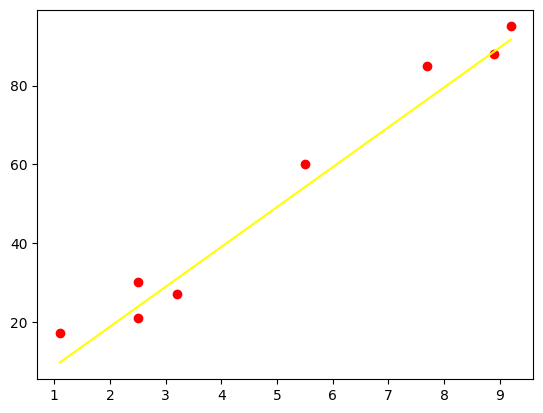

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([1.1, 2.5, 2.5, 3.2, 5.5, 7.7, 8.9, 9.2])
#| 17  | 21  | 30  | 27  | 60  | 85  | 88  | 95  |
Y=np.array([17, 21, 30, 27, 60, 85, 88, 95])

b=-1.502969
w=10.127457
def predict(x):
    return w*x+b
plt.scatter(X, Y, color = 'red')
plt.plot(X ,predict(X), color ='yellow')
plt.show()


## Implementation

1. feed the data to our prediction function $ f(x;w,b) = wx+b $
2. add up all the distance between real data and prediction function $ \sum_{i=1}^{n} (y_{true}-f(w,b;x_i))^2 $
3. using <b>nonlinear optimization</b> to find the minimum of w and b

w=10.205028, b=1.109242


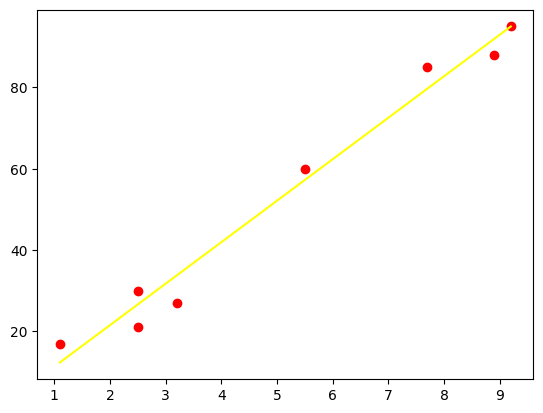

In [35]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([1.1, 2.5, 2.5, 3.2, 5.5, 7.7, 8.9, 9.2])
#| 17  | 21  | 30  | 27  | 60  | 85  | 88  | 95  |
Y=np.array([17, 21, 30, 27, 60, 85, 88, 95])

#prediction function
def predic(x,w,b):
    return w*x+b

 
def gradient(f,X,h):
    #df has the same length(size) as vector X
    df = np.zeros(X.size)
    #i mean dimention, axis
    for i in range(X.size):
        #difference at point x_i
        #a1, a2 is a vector like X,
        #only differentiate at one axis i, and keep other axis orinal point
        a1 = X.copy()
        a2 = X.copy()
        a1[i] = X[i] - h
        a2[i] = X[i] + h
        df[i] = ( f(a2) - f(a1) )/(2*h)
    return df   

def steepest_descent(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    while abs(f_old-f_new)>precision:
    #while np.linalg.norm(ad.gh(f)[0](x))>precision: # an alternative stopping rule
        f_old = f_new # store value at the current point
        d = -gradient(f,x,0.01) # search direction
        x = x+d*step # take a step
        f_new = f(x) # compute function value at the new point
        steps.append(list(x)) # save step
    return x,f_new,steps

def linear_regression():
    F = []
    for i in range(0, np.size(X)):
        fi = lambda p: (Y[i]-predic(X[i],p[0],p[1]))**2
        F.append(fi)
    loss = lambda p: sum( fi(p) for fi in F)/8
    #print(loss([11,2.5]))
    start = [0.0,0.0]
    step_size = 0.001
    precision = 0.00001
    (x_value,f_value,steps) = steepest_descent(loss,start,step_size,precision)
    return x_value


value = linear_regression()
print('w=%f, b=%f'%(value[0],value[1]))
plt.scatter(X, Y, color = 'red')
plt.plot(X , predic(X,value[0],value[1]), color ='yellow')
plt.show()


### Mathematical Model

dataset
$$\begin{align}
&x_i = (x_1, x_2, ..., x_n), i = 1,2,...,n \\
&y_i = (y_1, y_2, ..., y_n), i = 1,2,...,n \\
\end{align}$$

prediction function
$$\begin{align}
&y(x;\omega,\beta) = \omega{x} + \beta
\end{align}$$

loss function
$$\begin{align}
&loss(\omega,\beta;x) = \frac{1}{n}\sum_{i=1}^{n}(y_i-(\omega{x_i} + \beta))^2, i=1,2,...,n
\end{align}$$

convert to minimization problem
$$\begin{align}
&\min. \quad loss(\omega,\beta;x) \\
&\Delta{loss(\omega,\beta;x)} = 0 \\
& \frac{dloss(\omega,\beta;x)}{d\omega} = 0 \\
& \frac{dloss(\omega,\beta;x)}{d\beta} = 0
\end{align}$$


Optimiztion: Gradient Decent
$$\begin{align}
&\alpha_{i} = h, \quad \lim(h \to 0), \quad i=0 \\  
&\alpha_{i+1} = \alpha_{i} - \gamma{\Delta{loss(\omega,\beta;\alpha_{i})}} \\
&\alpha_{i} =\alpha_{i+1}, \quad i = 1 \\
&\alpha_{i+1} = \alpha_{i} - \gamma{\Delta{loss(\omega,\beta;\alpha_{i})}} \\
&...
\end{align}$$

### Conclusion
In Statistics, It is really important to find relation between data and make it into model. linear regression with one words is to draw a line between data while keep every point to the line has shortest distance.
